In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [ ]:
import pandas as pd
bank_df = pd.read_csv('bank.csv', sep=',')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [ ]:
bank_df.shape

(7234, 17)

In [ ]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
bank_df.isnull().any(axis=1)

0        True
1        True
2        True
3        True
4        True
        ...  
7229    False
7230    False
7231    False
7232     True
7233     True
Length: 7234, dtype: bool

In [ ]:
bank_df.isnull().any(axis=0)

age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool

In [ ]:
bank_df.isnull().sum(axis=1)

0       2
1       2
2       2
3       2
4       2
       ..
7229    0
7230    0
7231    0
7232    1
7233    1
Length: 7234, dtype: int64

In [ ]:
bank_df.isnull().sum(axis=0)

age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64

In [ ]:
import numpy as np
np.sort(bank_df.isnull().sum(axis=1))

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


In [ ]:
import matplotlib.pyplot as plt

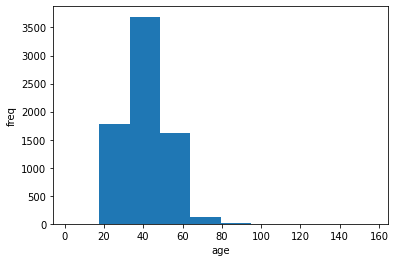

In [ ]:
plt.hist(bank_df['age'])
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

In [ ]:
bank_df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,7190,7234,6961,7234,7234,7234,5196,7234,1334,7234
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,yes,no,cellular,may,failure,no
freq,1560,4343,3745,7101,4058,6066,4697,2202,772,6381


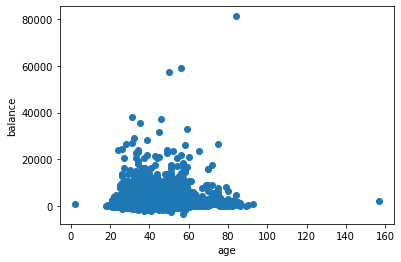

,age,balance
age,1.000000,0.112364
balance,0.112364,1.000000


In [ ]:
plt.scatter(bank_df['age'], bank_df['balance'])
plt.xlabel('age')
plt.ylabel('balance')
plt.show()
bank_df[['age','balance']].corr()

In [ ]:
bank_df['job'].value_counts(ascending=False, normalize=True)

management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64

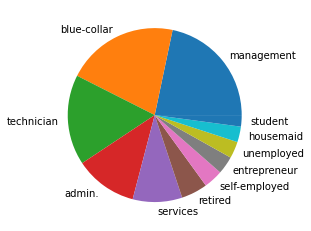

In [ ]:
job_label = bank_df['job'].value_counts(ascending=False, normalize=True).index
job_vals = bank_df['job'].value_counts(ascending=False, normalize=True).values
plt.pie(job_vals, labels=job_label)
plt.show()

In [ ]:
# 결손값 제외
bank_df = bank_df.dropna(subset=['job', 'education'])
print(bank_df.shape)

(6935, 17)


In [ ]:
bank_df = bank_df.dropna(thresh=2400, axis=1)
bank_df.shape

(6935, 16)

In [ ]:
# 결손값 보완
bank_df = bank_df.fillna({'contact':'unknown'})
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,no
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,no
3,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,no
4,24,technician,single,secondary,no,-103,yes,yes,unknown,5,may,145,1,-1,0,no


In [ ]:
# 특이값 제외
bank_df = bank_df[bank_df['age'] >= 18]
bank_df = bank_df[bank_df['age'] < 100]
bank_df.shape

(6933, 16)

In [ ]:
# 문자열을 수치로 변환
bank_df = bank_df.replace('yes', '1')
bank_df = bank_df.replace('no', '0')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,0
1,36,technician,single,secondary,0,265,1,1,unknown,5,may,348,1,-1,0,0
2,25,blue-collar,married,secondary,0,-7,1,0,unknown,5,may,365,1,-1,0,0
3,53,technician,married,secondary,0,-3,0,0,unknown,5,may,1666,1,-1,0,0
4,24,technician,single,secondary,0,-103,1,1,unknown,5,may,145,1,-1,0,0


In [ ]:
bank_df_job = pd.get_dummies(bank_df['job'])
bank_df_job.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# 수치자료와 더미변수를 결합한 자료 불러오기(직업은 제외)
from google.colab import files
up = files.upload()

Saving bank-prep.csv to bank-prep.csv


In [ ]:
bank_df = pd.read_csv('bank-prep.csv', sep=',')
bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# 데이터 세트에서 목적 변수를 제외
bank_df = bank_df.drop('y', axis=1)

In [ ]:
mc = MinMaxScaler()
mc.fit(bank_df)
print(mc.n_samples_seen_, mc.data_min_, mc.data_max_, mc.feature_range)

6933 [ 1.900e+01  0.000e+00 -3.313e+03  0.000e+00  0.000e+00  1.000e+00
  0.000e+00  1.000e+00 -1.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00] [9.0000e+01 1.0000e+00 8.1204e+04 1.0000e+00 1.0000e+00 3.1000e+01
 3.3660e+03 4.4000e+01 8.5000e+02 4.0000e+01 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00] (0, 1)


In [ ]:
# bank_df의 각 항목을 정규화
bank_df_mc = pd.DataFrame(mc.transform(bank_df), columns=bank_df.columns)
bank_df_mc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0.549296,0.0,0.064555,1.0,0.0,0.133333,0.077540,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.239437,0.0,0.042335,1.0,1.0,0.133333,0.103387,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.084507,0.0,0.039116,1.0,0.0,0.133333,0.108437,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.478873,0.0,0.039164,0.0,0.0,0.133333,0.494949,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.070423,0.0,0.037981,1.0,1.0,0.133333,0.043078,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
bank_df_mc.mean()

age          0.305136
default      0.018462
balance      0.055470
housing      0.565412
loan         0.165008
day          0.485648
duration     0.078067
campaign     0.039763
pdays        0.048986
previous     0.014290
divorced     0.116400
married      0.598731
single       0.284869
primary      0.148565
secondary    0.538584
tertiary     0.312852
cellular     0.656137
telephone    0.066494
unknown      0.277369
apr          0.061878
aug          0.132843
dec          0.004039
feb          0.066926
jan          0.027261
jul          0.158950
jun          0.110053
mar          0.009952
may          0.304774
nov          0.093033
oct          0.017885
sep          0.012404
dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(bank_df)
bank_df_sc = pd.DataFrame(sc.transform(bank_df), columns=bank_df.columns)
bank_df_sc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1.647908,-0.137148,0.250618,0.876711,-0.444540,-1.275382,-0.006613,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
1,-0.443424,-0.137148,-0.362335,0.876711,2.249514,-1.275382,0.317659,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
2,-1.489090,-0.137148,-0.451112,0.876711,-0.444540,-1.275382,0.381022,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
3,1.172605,-0.137148,-0.449807,-1.140627,-0.444540,-1.275382,5.230180,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
4,-1.584150,-0.137148,-0.482445,0.876711,2.249514,-1.275382,-0.438974,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073


In [ ]:
bank_df_sc.mean()

age         -2.859389e-16
default      4.099482e-17
balance     -3.279586e-17
housing      1.065865e-16
loan        -3.279586e-17
day          8.198964e-18
duration    -2.049741e-18
campaign     0.000000e+00
pdays       -3.279586e-17
previous     3.279586e-17
divorced    -8.198964e-18
married     -2.869637e-17
single      -9.838757e-17
primary      7.379068e-17
secondary    1.065865e-16
tertiary    -8.198964e-18
cellular     1.967751e-16
telephone   -3.279586e-17
unknown     -9.838757e-17
apr         -1.639793e-17
aug          0.000000e+00
dec          1.639793e-17
feb          0.000000e+00
jan         -4.919379e-17
jul          0.000000e+00
jun         -3.279586e-17
mar         -1.639793e-17
may          9.838757e-17
nov         -3.279586e-17
oct          1.639793e-17
sep         -6.559171e-17
dtype: float64

In [ ]:
bank_df_sc.std()

age          1.000072
default      1.000072
balance      1.000072
housing      1.000072
loan         1.000072
day          1.000072
duration     1.000072
campaign     1.000072
pdays        1.000072
previous     1.000072
divorced     1.000072
married      1.000072
single       1.000072
primary      1.000072
secondary    1.000072
tertiary     1.000072
cellular     1.000072
telephone    1.000072
unknown      1.000072
apr          1.000072
aug          1.000072
dec          1.000072
feb          1.000072
jan          1.000072
jul          1.000072
jun          1.000072
mar          1.000072
may          1.000072
nov          1.000072
oct          1.000072
sep          1.000072
dtype: float64

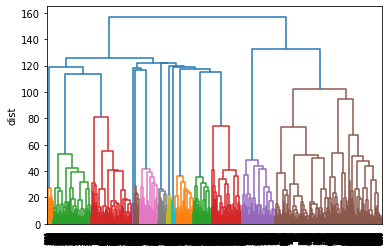

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
hcls = linkage(bank_df_sc, metric='euclidean', method='ward')
dendrogram(hcls)
plt.ylabel('dist')
plt.show()

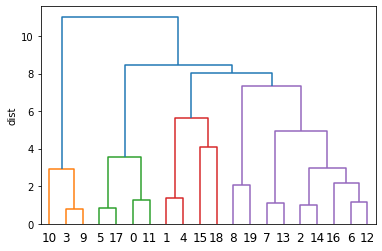

In [ ]:
hcls0to19 = linkage(bank_df_sc[:20], metric='euclidean', method='ward')
dendrogram(hcls0to19)
plt.ylabel('dist')
plt.show()

In [ ]:
from google.colab import files
img0 = files.upload()

Saving swiss-army-ant.jpg to swiss-army-ant.jpg


In [ ]:
import cv2
img = cv2.imread('swiss-army-ant.jpg')
img.shape

(261, 280, 3)

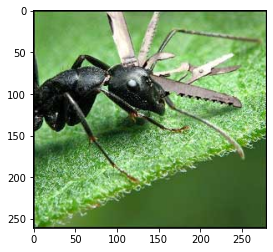

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()